# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [2]:
# Your code here
df = pd.read_csv('../data/boston_data.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 14 columns):
crim       404 non-null float64
zn         404 non-null float64
indus      404 non-null float64
chas       404 non-null float64
nox        404 non-null float64
rm         404 non-null float64
age        404 non-null float64
dis        404 non-null float64
rad        404 non-null float64
tax        404 non-null float64
ptratio    404 non-null float64
black      404 non-null float64
lstat      404 non-null float64
medv       404 non-null float64
dtypes: float64(14)
memory usage: 44.3 KB


In [28]:
#I delete the outliers

In [25]:
df_clean = df[df.medv != 50]

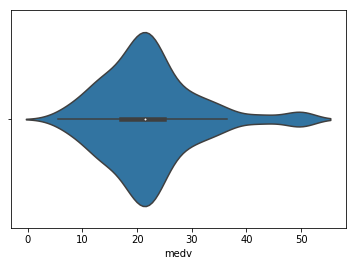

In [37]:
sns.violinplot(df.medv)

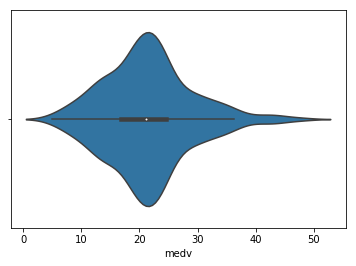

In [27]:
sns.violinplot(df_clean.medv)

In [29]:
df_clean.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [30]:
df_clean.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,392.000000,392.000000,392.000000,392.000000,392.00000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,3.774388,10.053571,11.206454,0.061224,0.55677,6.258709,68.478827,3.829298,9.859694,412.543367,18.521429,354.170128,12.854541,21.464796
std,9.061775,21.257457,6.765032,0.240048,0.11804,0.627848,28.055584,2.115111,8.838315,170.772558,2.082812,95.770931,6.862150,7.499458
min,0.006320,0.000000,0.740000,0.000000,0.39200,3.561000,2.900000,1.178100,1.000000,187.000000,12.600000,0.320000,1.980000,5.000000
25%,0.082598,0.000000,5.320000,0.000000,0.45300,5.890500,45.800000,2.102875,4.000000,284.000000,17.400000,374.710000,7.385000,16.775000
50%,0.250895,0.000000,9.795000,0.000000,0.53200,6.221000,76.500000,3.272100,5.000000,330.000000,19.100000,391.240000,11.475000,21.200000
75%,4.053158,12.500000,18.100000,0.000000,0.63500,6.590750,94.100000,5.255350,24.000000,666.000000,20.200000,396.157500,17.102500,24.625000
max,88.976200,95.000000,27.740000,1.000000,0.87100,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,34.370000,48.300000


In [31]:
df_clean.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

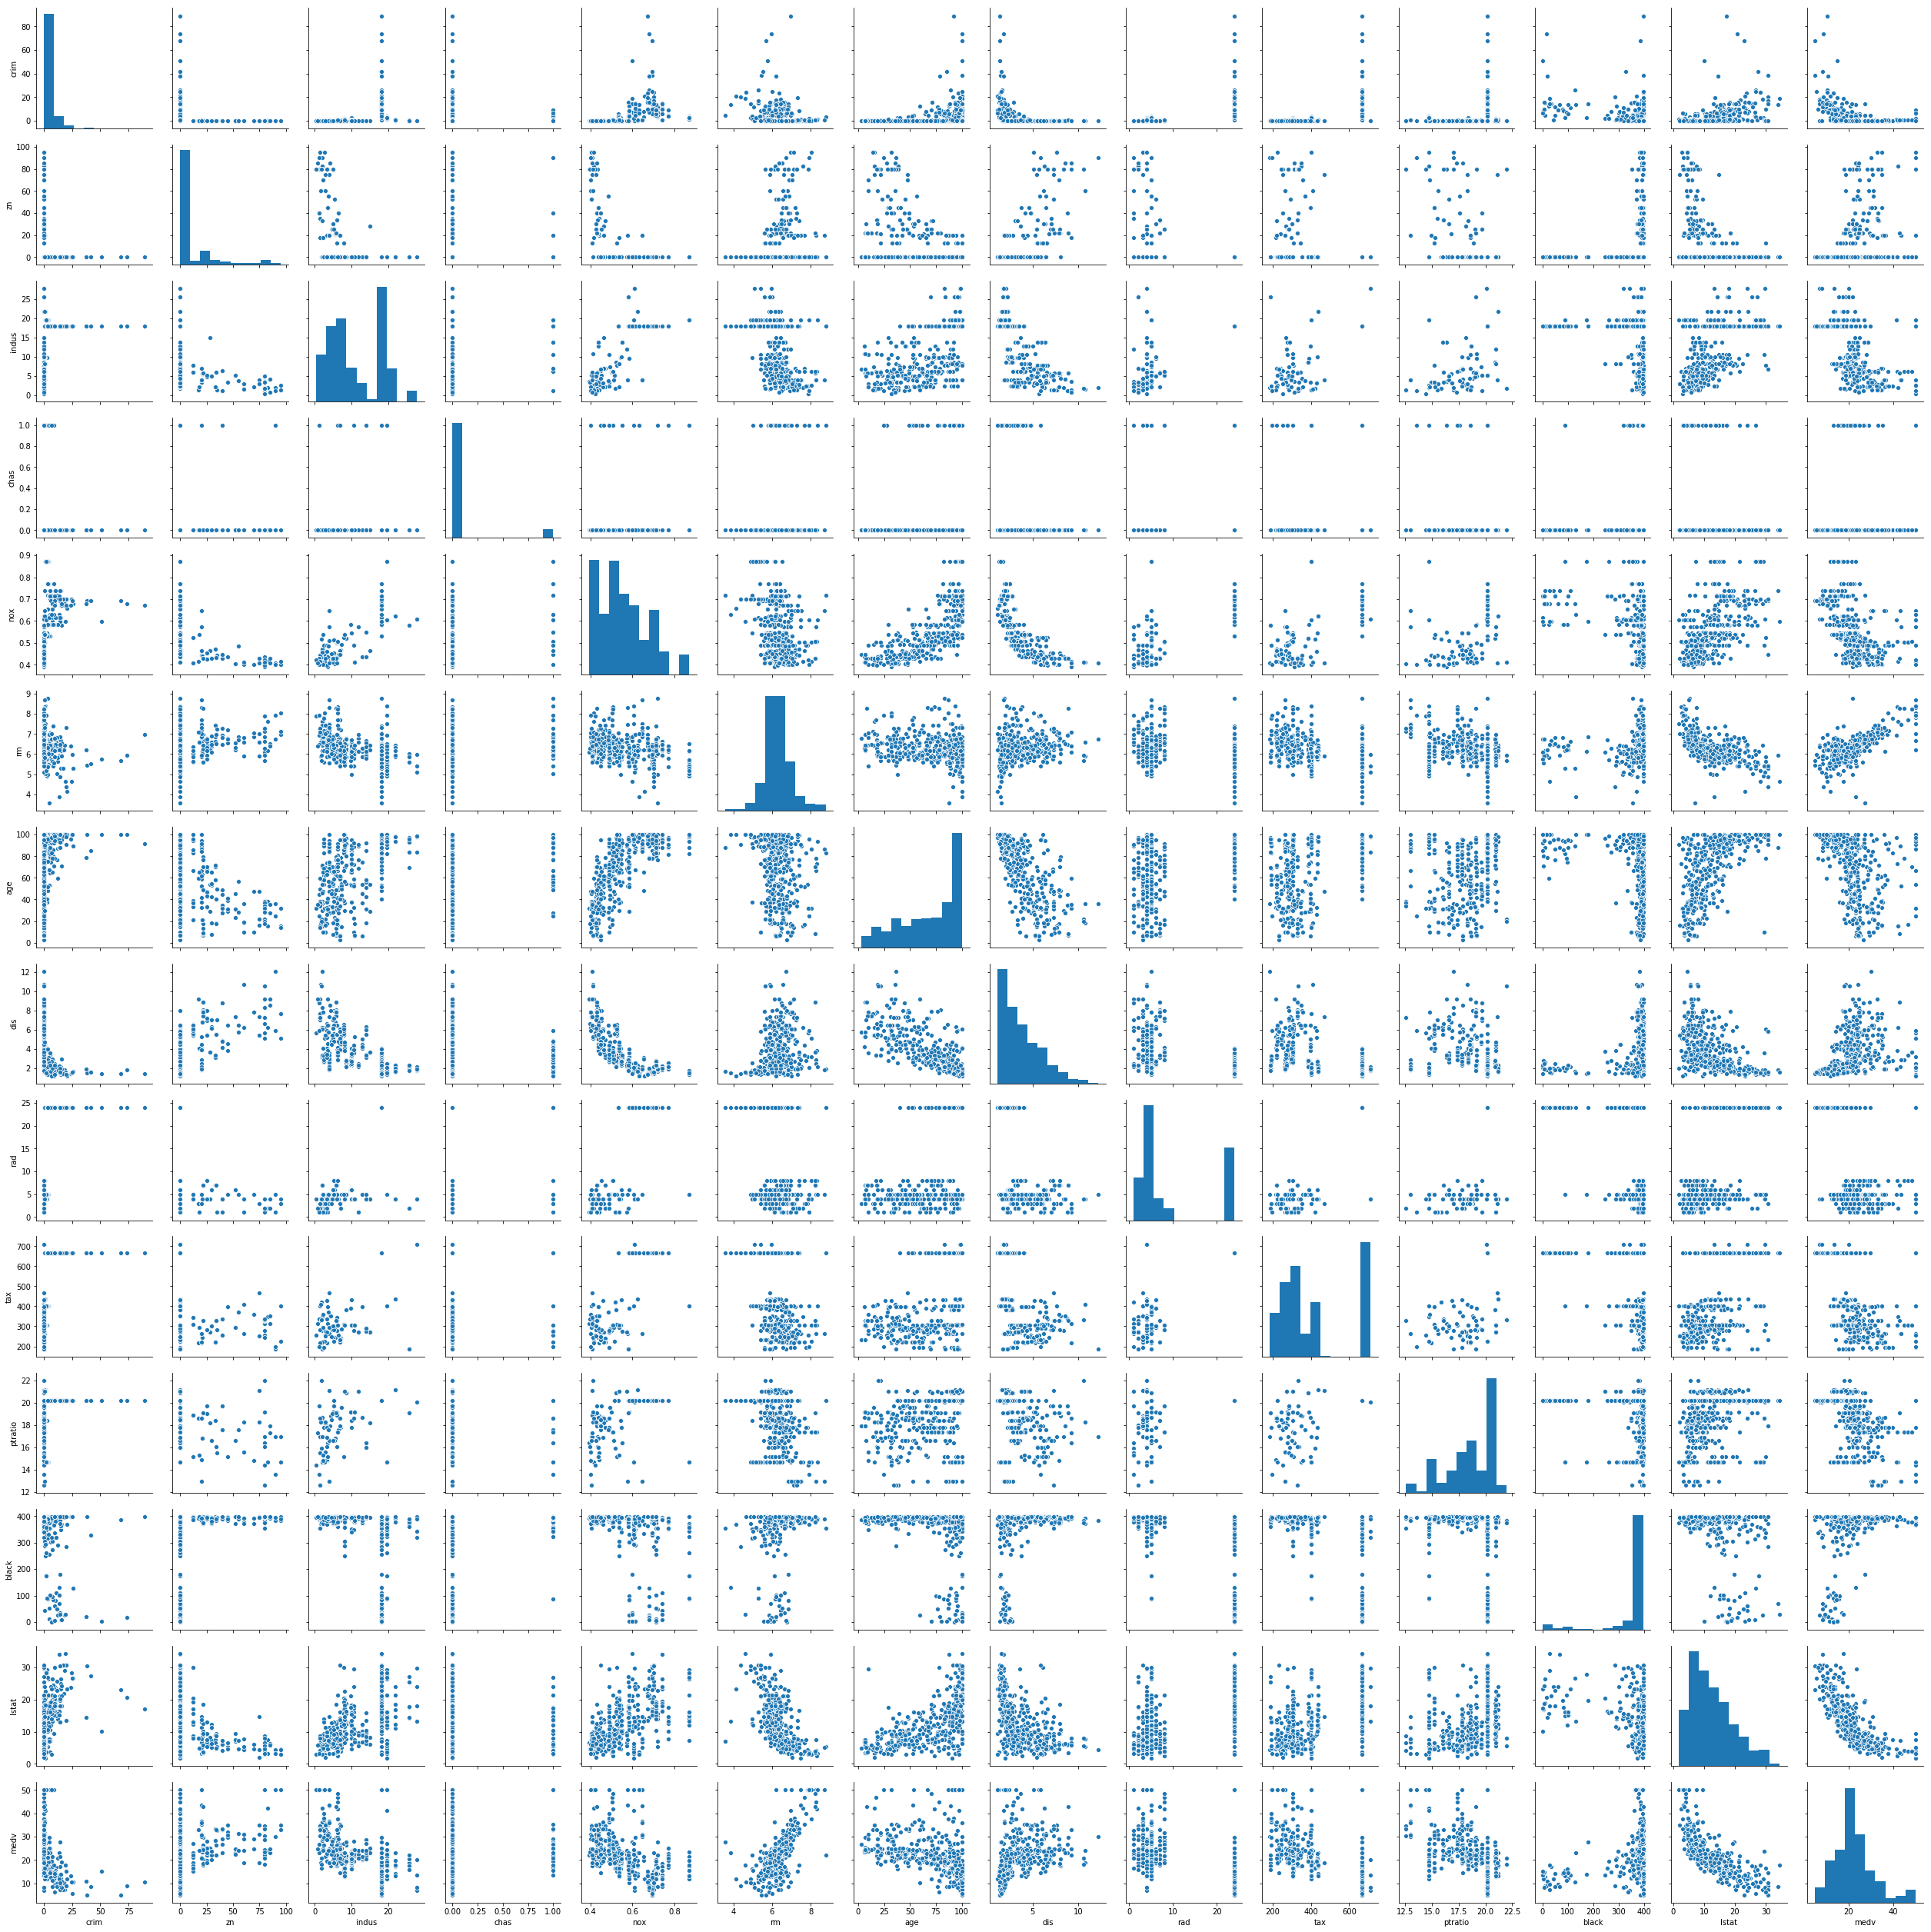

In [32]:
sns.pairplot(df)

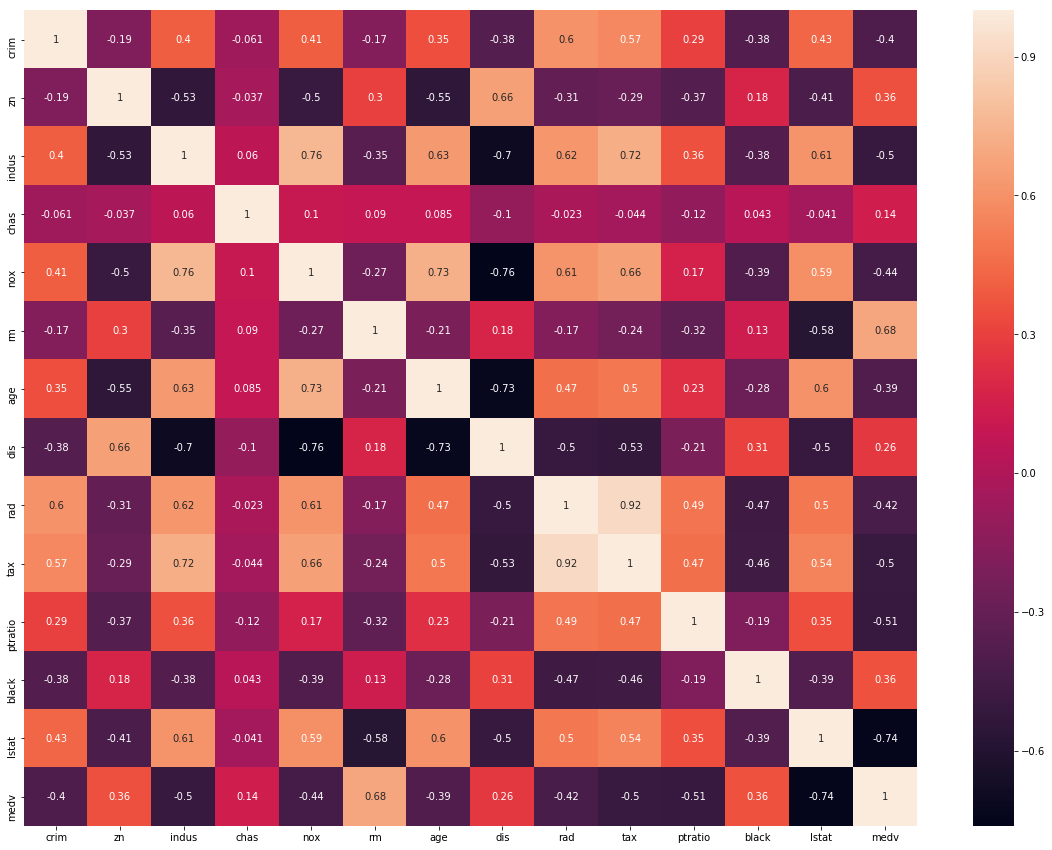

In [33]:
plt.figure(figsize = [20,15])
sns.heatmap(df.corr(), annot = True)

### Next, we want to explore the data. Pick several varibables you think will be ost correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.

In [43]:
# Your plots here
df_features = df_clean[['lstat', 'rm', 'ptratio', 'tax', 'medv']]

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

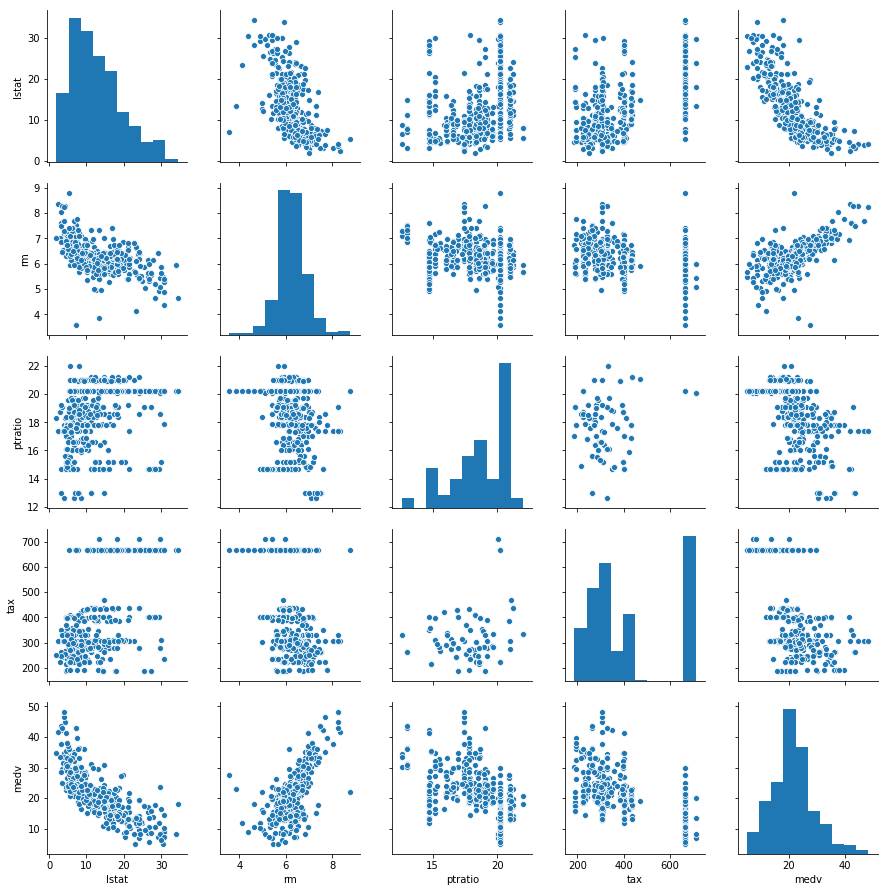

In [44]:
# Your response here
sns.pairplot(df_features)

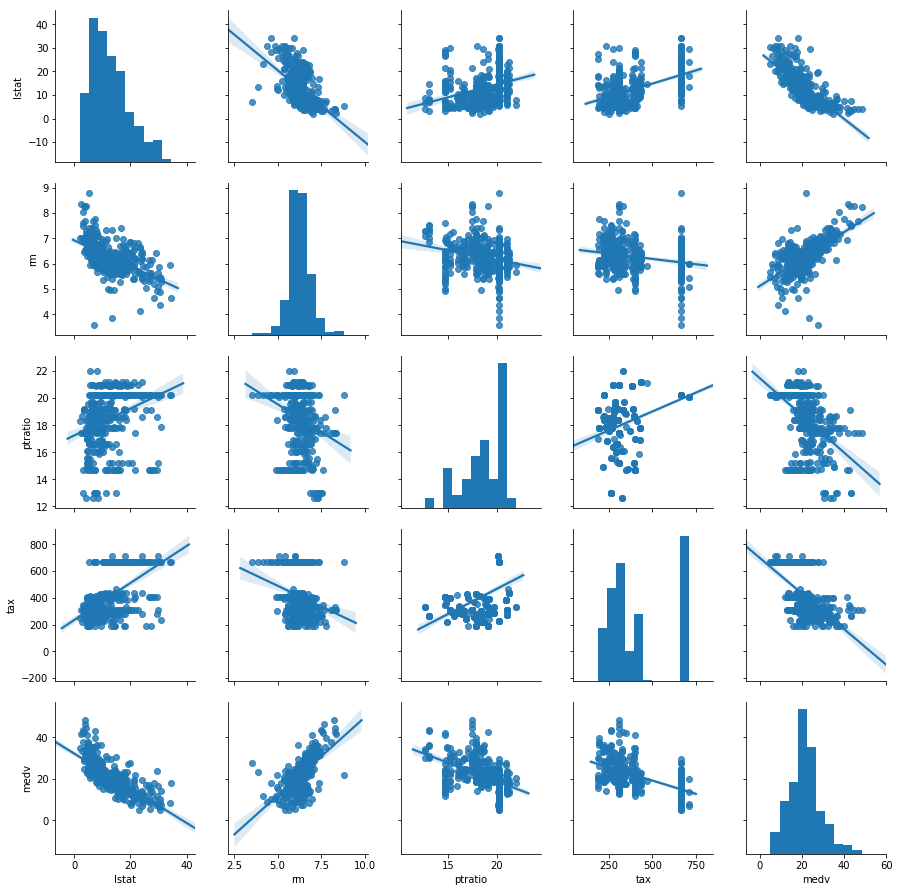

In [81]:
sns.pairplot(df_features, kind="reg")

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

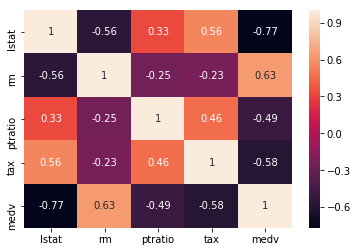

In [46]:
# Your response here
sns.heatmap(df_features.corr(), annot = True)

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation. 

In [47]:
# Your code here
df_features.describe()

,lstat,rm,ptratio,tax,medv
count,392.000000,392.000000,392.000000,392.000000,392.000000
mean,12.854541,6.258709,18.521429,412.543367,21.464796
std,6.862150,0.627848,2.082812,170.772558,7.499458
min,1.980000,3.561000,12.600000,187.000000,5.000000
25%,7.385000,5.890500,17.400000,284.000000,16.775000
50%,11.475000,6.221000,19.100000,330.000000,21.200000
75%,17.102500,6.590750,20.200000,666.000000,24.625000
max,34.370000,8.780000,22.000000,711.000000,48.300000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance meteric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [57]:
from sklearn.metrics import r2_score

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    # Your code here:
    return r2_score(y_true, y_predict)

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test. 

In [50]:
# Your code here
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_features.drop(columns = 'medv'), 
                                                    df_features['medv'], test_size=0.2, random_state = 12)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [76]:
# Five separate RFR here with the given max depths
from sklearn.ensemble import RandomForestRegressor

def RFR(depth):
    model = RandomForestRegressor(max_depth=depth, n_estimators=100, random_state= 42)
    model.fit(X_train, y_train)
    return (performance_metric(y_train,model.predict(X_train)),performance_metric(y_test,model.predict(X_test)))

Now, plot the score for each tree on the training set and on the testing set.

In [79]:
# Produce a plot with the score for the testing and training for the different max depths
for i in range(2,11,2):
    print(f"R2score in Random Forest Regressor with {i} depth is: Training R2score: {RFR(i)[0]} Test R2score: {RFR(i)[1]}")

R2score in Random Forest Regressor with 2 depth is: Training R2score: 0.7503267482130647 Test R2score: 0.7712477833806985
R2score in Random Forest Regressor with 4 depth is: Training R2score: 0.8772577088191919 Test R2score: 0.8774685134745863
R2score in Random Forest Regressor with 6 depth is: Training R2score: 0.9281212037041602 Test R2score: 0.8836162867697486
R2score in Random Forest Regressor with 8 depth is: Training R2score: 0.9530542330195276 Test R2score: 0.8812483688619912
R2score in Random Forest Regressor with 10 depth is: Training R2score: 0.9630230368032068 Test R2score: 0.8776106594927624


What do these results tell you about the effect of the depth of the trees on the performance of the model?

In [74]:
# Your response here
#There's an optimal depth and there is diminishing returns with the number of deepness

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [ ]:
# Your response here
# With a depth of 1, the model will suffer from high bias (underfitting).
# With a depth of 10, the model will suffer from high variance (overfitting) 
#and will not be a good model to inference the population.

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

In [80]:
# Your response here
for i in range(1,11,1):
    print(f"R2score in Random Forest Regressor with {i} depth is: Training R2score: {RFR(i)[0]} Test R2score: {RFR(i)[1]}")

R2score in Random Forest Regressor with 1 depth is: Training R2score: 0.5382982855033462 Test R2score: 0.5126342637910571
R2score in Random Forest Regressor with 2 depth is: Training R2score: 0.7503267482130647 Test R2score: 0.7712477833806985
R2score in Random Forest Regressor with 3 depth is: Training R2score: 0.832872355703203 Test R2score: 0.8499618295371377
R2score in Random Forest Regressor with 4 depth is: Training R2score: 0.8772577088191919 Test R2score: 0.8774685134745863
R2score in Random Forest Regressor with 5 depth is: Training R2score: 0.9076554076272415 Test R2score: 0.8807709689481537
R2score in Random Forest Regressor with 6 depth is: Training R2score: 0.9281212037041602 Test R2score: 0.8836162867697486
R2score in Random Forest Regressor with 7 depth is: Training R2score: 0.9428167624683896 Test R2score: 0.8844486276080223
R2score in Random Forest Regressor with 8 depth is: Training R2score: 0.9530542330195276 Test R2score: 0.8812483688619912
R2score in Random Forest 

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [ ]:
# Your response here
# If we want to use this data now, we should be careful with the inflation in Boston city. I got an 
# accuracy with the model of 0.8844 (7 depth) so I think it will be robust with the predictions. I don't think that 
# the model could be applied in a rural city, because we used data collected in an urban enviroment.